# Task B: Image Preprocessing

## 1. Preprocess the label file of MRI dataset

In [7]:
# Import necessary libraries
import pickle
import numpy as np
import pandas as pd

## 2. Preprocess MRI images

In [8]:
# Import necessary libraries
import cv2
from glob import glob

In [9]:
# Read 3000 512x512 pixel gray-scale MRI images
images = [cv2.imread(image, cv2.IMREAD_GRAYSCALE) 
          for image in glob('dataset/image/*.jpg')]

images_blur = [cv2.medianBlur(images[i], 5)
               for i in range(0, len(images))]

resize = 128
images_resized = [cv2.resize(images_blur[i], (resize,resize))
                  for i in range(0, len(images))]

In [10]:
hog = cv2.HOGDescriptor()   

images_hog = [hog.compute(images_resized[i])
              for i in range(0, len(images))]

In [11]:
# Transfer images into array dataformat.
images_TaskB = np.array(images_hog)

images_TaskB = images_TaskB.reshape(3000, images_TaskB.shape[1])
images_TaskB.shape

(3000, 34020)

In [12]:
# Save preprocessed data with help of pickle.
with open('DataAfterProcess/images_hog.pickle', 'wb') as handle:
    pickle.dump(images_TaskB, handle)

In [13]:
from sklearn.decomposition import PCA
n_components_test = 500

pca_test = PCA(n_components=n_components_test)
pca_test.fit(images_TaskB)

PCA(n_components=500)

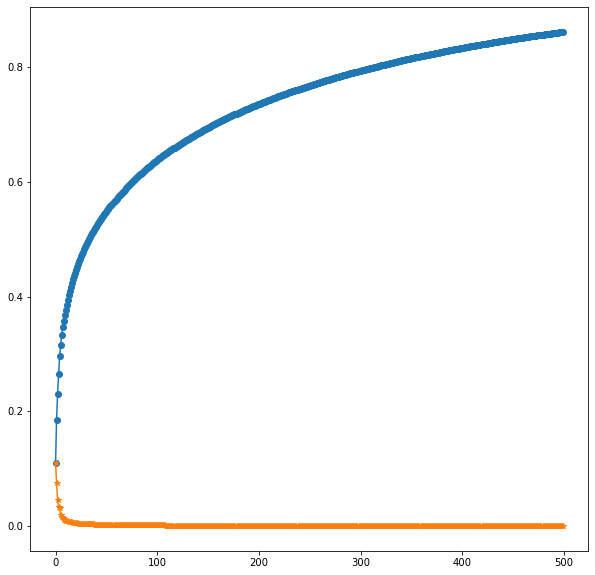

In [15]:
import matplotlib.pyplot as plt

variance_ratio = pca_test.explained_variance_ratio_
variance_ratio_cum = variance_ratio.cumsum()

plt.figure(figsize=(10,10))
plt.plot(variance_ratio_cum[:n_components_test], 'o-')
plt.plot(variance_ratio[:n_components_test], '*-')

In [16]:
pca_TaskB = PCA(n_components=400)
images_PCA_TaskB = pca_TaskB.fit_transform(images_TaskB)

In [17]:
with open('Model/DataProcess_PCA.pickle', 'wb') as handle:
    pickle.dump(pca_TaskB, handle)

## 4. Save preprocessed data

In [18]:
# Import necessary libraries
import pickle

In [19]:
# Generate new data array of preprocessed data.
# images_AfterProcess = images_PCA.copy()
images_AfterProcess = images_PCA_TaskB.copy()

# Check preprocessed data.
images_AfterProcess.shape

(3000, 400)

In [20]:
# Save preprocessed data with help of pickle.
with open('DataAfterProcess/images_AfterProcess.pickle', 'wb') as handle:
    pickle.dump(images_PCA_TaskB, handle)